Linear regression

In [ ]:
#여러가지 linear regression 실습
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

xx = np.linspace(0, 18, 180)
yy = slope * xx + intercept

plt.scatter(x, y)
plt.plot(xx, yy)
plt.show()

Learning rate

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def f(x):
    return x**2 - 4*x + 6

NumberOfPoints = 101
x = np.linspace(-5, 5, NumberOfPoints)
fx = f(x)

plt.plot(x, fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.show()

In [ ]:
xid = np.argmin(fx)
xopt = x[xid]
print(xopt, f(xopt))

plt.plot(x, fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.plot(xopt, f(xopt), 'xr')
plt.show()

In [ ]:
def f(x):
    return x**2 - 4*x + 6

def grad_fx(x):
    return 2*x - 4

def steepest_descent(func, grad_func, x0, learning_rate=0.01, Maxiter=10, verbose=True):
    paths = []
    for i in range(Maxiter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return (x0, func(x), paths)

In [ ]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 0.0, learning_rate=1.2)

x = np.linspace(0.5, 2.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [ ]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=1.0)

x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [ ]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=0.001)

x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [ ]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 3.0, learning_rate=0.9)

x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

Gradient

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)

print(x)
print(y)

x, y = np.meshgrid(x, y)
print(x)
print(y)

f = lambda x, y : (x-1)**2 + (y-1)**2
z = f(x, y)
print(z)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

grad_f_x = lambda x, y : 2 * (x-1)
grad_f_y = lambda x, y : 2 * (y-1)

dz_dx = grad_f_x(x, y)
dz_dy = grad_f_y(x, y)

ax = plt.axes()
ax.contour(x, y, z, levels=np.linspace(0, 10, 20), cmap=plt.cm.jet)
ax.quiver(x, y, -dz_dx, -dz_dy)
ax.grid()
ax.axis('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

Gradient_Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25
x, y = np.meshgrid(np.arange(xmin, xmax+xstep, xstep), np.arange(ymin, ymax+ystep, ystep))

f = lambda x, y : (x-2)**2 + (y-2)**2
z = f(x, y)
minima = np.array([2., 2.])
f(*minima)

0.0

[2. 2.] [[2.]
 [2.]]


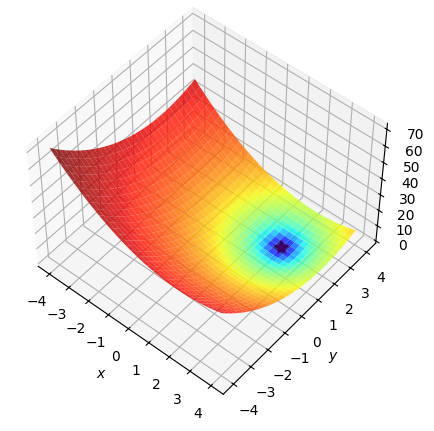

In [2]:
minima_ = minima.reshape(-1, 1)
print(minima, minima_)
surf(f, x, y, minima=minima_)

/home/ljh/intro/visualize.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x, y), levels=level, norm=norm, cmap=plt.cm.jet)


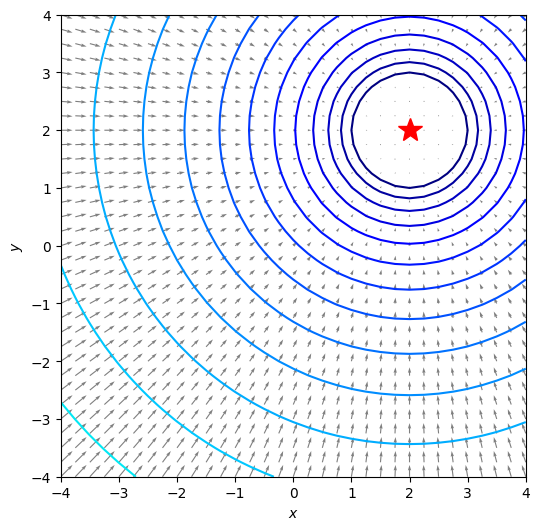

In [3]:
grad_f_x = lambda x, y : 2*(x-2)
grad_f_y = lambda x, y : 2*(y-2)
contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)

In [4]:
def steepest_descent_twod(func, gradx, grady, x0, Maxiter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxiter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        x1 = x0 - learning_rate * grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return (x0, fval, paths, fval_paths)

/home/ljh/intro/visualize.py:39: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x, y), levels=level, norm=norm, cmap=plt.cm.jet)


0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


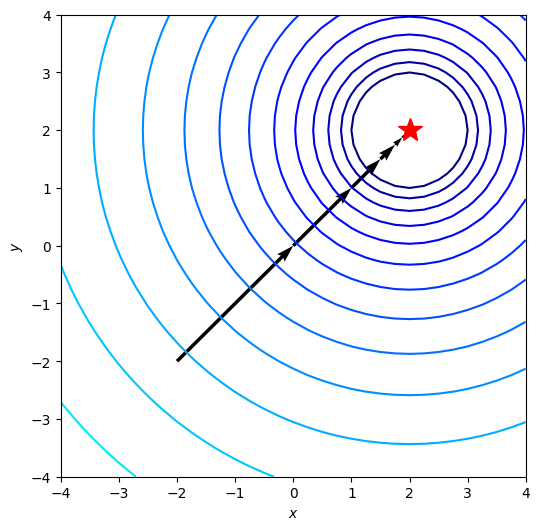

In [5]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f, x, y, paths, minima=np.array([[2], [2]]))

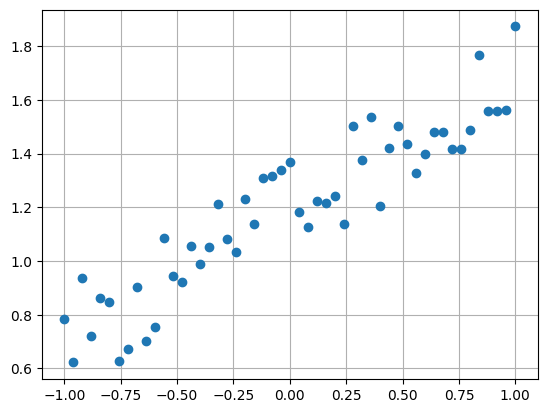

In [6]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x : 0.5*x + 1.0
y_train = f(x_train) + 0.4*np.random.rand(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [7]:
np.random.seed(303)
shuffle_id = np.arange(0, len(x_train))
np.random.shuffle(shuffle_id)
x_train = x_train[shuffle_id]
y_train = y_train[shuffle_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5*(w[0]*x_set[i] + w[1] - y_set[i])**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0]*x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    : param batch_size : The batch size
    : param features : List of features
    : param labels : List of labels
    : param Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

Gradient Descents

In [23]:
# SGD
batch_size = 10
lr = 0.01
MaxEpochs = 51
# Momentum
alpha = .9
# Adagrad
epsilon = 0.25
delta = 1e-6
# RMSProp
rho = 0.9
# Adam
rho1 = 0.9
rho2 = 0.999

In [9]:
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch%10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr*grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [3.36748902 0.05509539] 2.114661863449622
20 [2.85966989 0.6217412 ] 1.163370846765917
30 [2.4470799  0.92319527] 0.7232771480224915
40 [2.10909494 1.08113942] 0.4806179088890847
50 [1.83067577 1.16181581] 0.3296288926560264


Momentum

In [10]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.83302959 1.20678435] 0.03003201597220386
20 [0.4684414 1.2013792] 0.006758172467077168
30 [0.46435817 1.19757988] 0.0067419444174559254
40 [0.46490866 1.19741605] 0.006741085572109452
50 [0.46493098 1.19741456] 0.006741066002074992


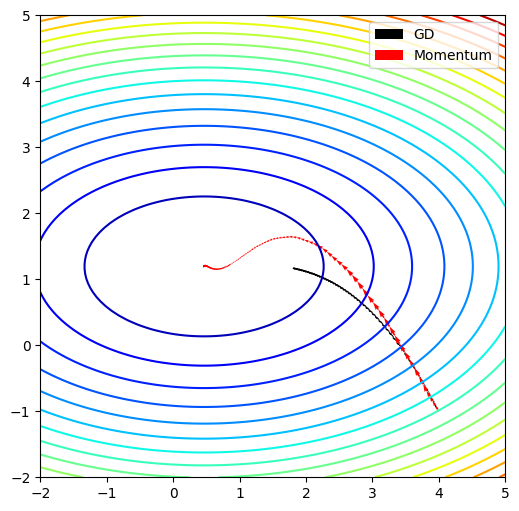

In [33]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Momentum'])
plt.show()

Adagrad

In [12]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []
for epoch in range(MaxEpochs):
    if epoch%10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon/(delta+np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [1.6153188  1.01038019] 0.25234878363881025
20 [0.98465014 1.19069321] 0.053196556736343825
30 [0.70781172 1.20756929] 0.01686965476866836
40 [0.57927308 1.20449025] 0.00896812491001545
50 [0.51875391 1.20119494] 0.007221233784661749


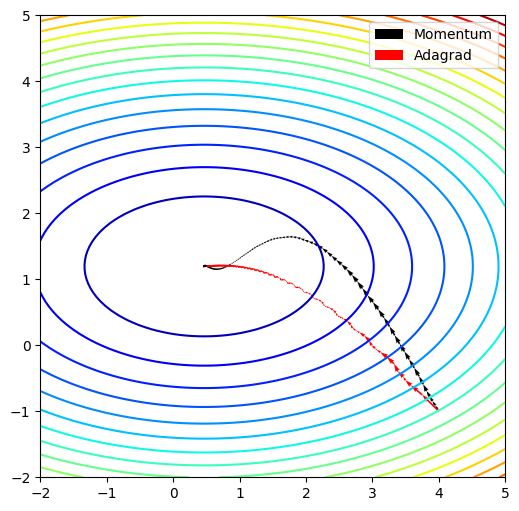

In [32]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['Momentum', 'Adagrad'])
plt.show()

RMSProp

In [20]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch%10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1 - rho) * grad * grad
        delw = -epsilon/np.sqrt(delta + r)*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.39349326 1.23710405] 0.008560244863137828
20 [0.36918551 1.25040353] 0.00993044413018103
30 [0.36924013 1.2503992 ] 0.009928352276478295
40 [0.36924089 1.25039879] 0.009928303969348328
50 [0.36924089 1.25039879] 0.009928303832625024


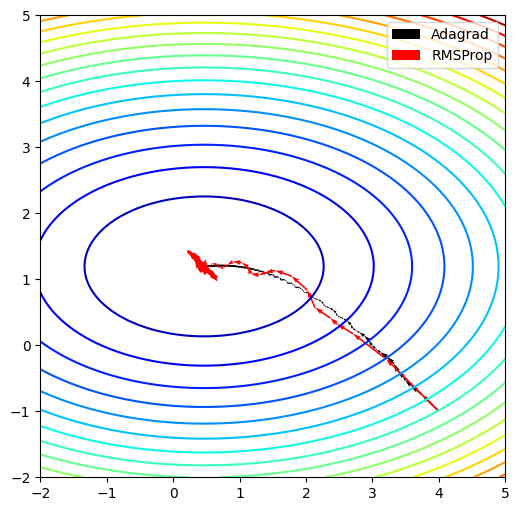

In [21]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['Adagrad', 'RMSProp'])
plt.show()

Adam

In [29]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
s = np.zeros_like(w0)
t = 0
path_adam = []
for epoch in range(MaxEpochs):
    if epoch%10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho1 * s + (1 - rho1) * grad
        r = rho2 * r + (1 - rho2) * grad * grad
        t += 1
        s2 = s/(1-rho1**t)
        r2 = r/(1-rho2**t)
        delw = -epsilon/(np.sqrt(r2)+delta)*s2
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.57887295 1.2939518 ] 0.013804049256667542
20 [0.46038657 1.20156834] 0.006766569315132601
30 [0.46377827 1.19766071] 0.006742742679929379
40 [0.46327818 1.19778491] 0.006743680698675296
50 [0.46303814 1.19784123] 0.006744157820560651


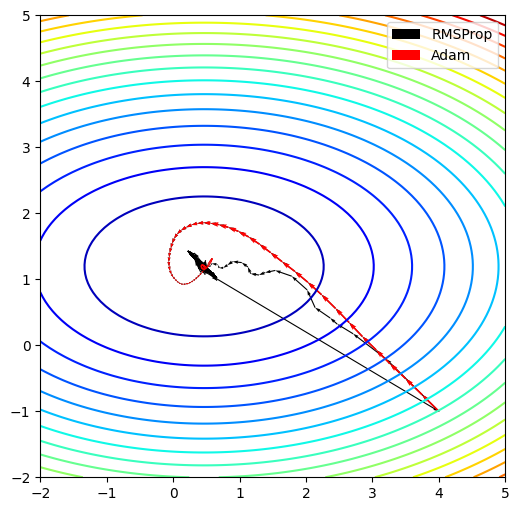

In [30]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        lossw[i, j] = loss(wij, x_train, y_train)
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['RMSProp', 'Adam'])
plt.show()